# Name: Madhukar Mishra 

Prediction Using Supervised ML Task 1(Level-Bigginer)

Predict the percentage of an student based on the no. of study hours


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

## Loading The Dataset

In [10]:
df=pd.read_csv('iris1.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Dataset Size

In [14]:
df.shape

(25, 2)

### Informaion

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Statistical Details

In [19]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


 From the above table,it is observed the data is slightly right skewed as mean>median(50%)

#### Univariate Analysis

#### Distribution Plot For 'Hours'
                                                                                

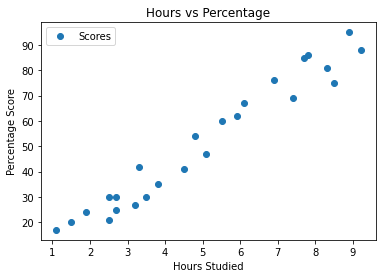

In [30]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

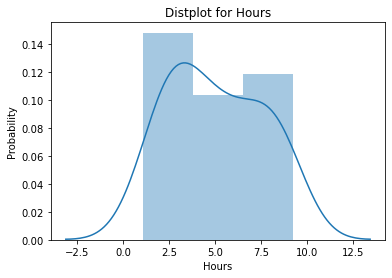

In [22]:
sns.distplot(df['Hours'])
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.title('Distplot for Hours')
plt.show()

### Distribution Plot For Score

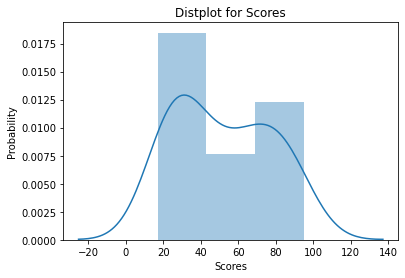

In [25]:
sns.distplot(df['Scores'])
plt.xlabel('Scores')
plt.ylabel('Probability')
plt.title('Distplot for Scores')
plt.show()

For both the plot it is observed that the distribution of both the variable is slightly right skewed

### Bivariate Analysis

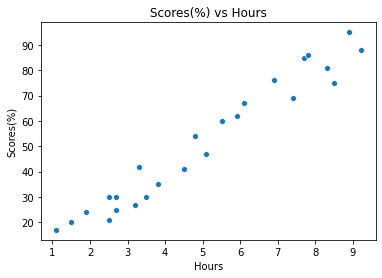

In [28]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores(%)')
plt.title('Scores(%) vs Hours')
plt.show()

From above scatter plot,it is observed the the score are highly positively correlated with the number of hour increases so shall the marks increase

### Multivariate Analysis

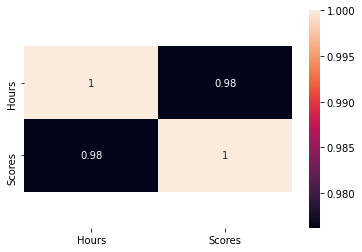

In [33]:
ax=sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

For the heatmap , it observed the correlation is the highly positive and the value of correlation between the hour of study id 0.98 

In [35]:
x=df[['Hours']]
y=df[['Scores']]

### Spilitting the data in train and test

In [37]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
xtrain.shape , xtest.shape

((20, 1), (5, 1))

### Using Lnear Reagresion For Buildig The Model and Prediction

In [46]:
from sklearn.linear_model import LinearRegression

In [49]:
lr=LinearRegression(fit_intercept=True)

### Fitting the Model

In [51]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [54]:
#LinearRegression intecept
lr.intercept_

array([2.01816004])

In [56]:
#linear Regression coefficient for hour
lr.coef_

array([[9.91065648]])

### Plotting the Regression Line

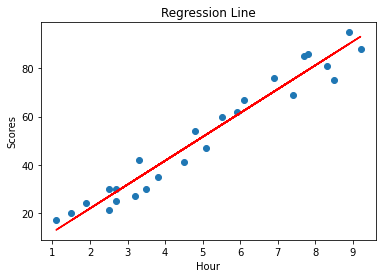

In [58]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')
plt.xlabel('Hour')
plt.ylabel('Scores')
plt.title('Regression Line')
plt.show()

### Predicting for Xtest

In [60]:
y_pred=lr.predict(xtest)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [62]:
y_pred=y_pred.flatten()

In [64]:
data=pd.DataFrame({'Actual':ytest.values.flatten(),'Prediction':y_pred})

In [66]:
print(data)

   Actual  Prediction
0      20   16.884145
1      27   33.732261
2      69   75.357018
3      30   26.794801
4      62   60.491033


In [68]:
lr.score(xtest,ytest)

0.9454906892105354

### Testing For New Data

In [71]:
hours=np.array(9.25).reshape(1,-1)
result=lr.predict(hours)
print('No Of Hours:',np.asscalar(hours))
print('Predicted score (%):',np.asscalar(result))

No Of Hours: 9.25
Predicted score (%): 93.69173248737539


<ipython-input-71-697f5482c037>:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('No Of Hours:',np.asscalar(hours))
<ipython-input-71-697f5482c037>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Predicted score (%):',np.asscalar(result))


### Evaluating The Model

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [75]:
RMSE = mean_squared_error(ytest,y_pred,squared=False)

In [79]:
print('The RMSE is:',RMSE)

The RMSE is: 4.647447612100373


In [81]:
MSE = mean_squared_error(ytest,y_pred)

In [83]:
print('The MSE is:',MSE)

The MSE is: 21.598769307217456


In [85]:
MAE = mean_absolute_error(ytest,y_pred)

In [86]:
print('The MAE is:',MAE)

The MAE is: 4.183859899002982
